# Übung 4 - kNN & SVM
Notwendige Bibliotheken werden geladen.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Auszug aus der Datenvorbereitung
Erläutern Sie mit Kommentaren im Code, was hier jeweils durchgeführt wird durch die einzelnen Befehle.

In [4]:
# Prepocessing package importieren
from sklearn import preprocessing 

# CSV Datei einlesen
df = pd.read_csv('01_Kundendaten.csv') 

# Neue Spalte, Wert 1 einsetzen bei total_sum größer 300, sonst 0
df['high revenue'] = np.where(df['total_sum'] > 300, 1, 0)

# Neues Dataframe mit nur den angegebenen Spalten
dfFilter = df[['gender','age_first_order','user_agent_brand',
         'user_agent_os', 'campaign', 'pages_visited_avg','high revenue']]

# Komplettes Dataframe wird in ein neues (dfCopy) dupliziert
dfCopy = dfFilter.copy()

# Null-Werte in der Spalte gender und age_first_order werden durch den am häufigsten vorkommenden Wert ersetzt
dfCopy['gender'] = dfCopy['gender'].fillna(dfCopy['gender'].mode()[0])
dfCopy['age_first_order'] = dfCopy['age_first_order'].fillna(dfFilter['age_first_order'].mode()[0])

# Werte in Spalte campaign in Integer umwandeln
dfCopy["campaign"] = dfCopy["campaign"].astype(int)

# Komplettes Dataframe wird in ein neues (dfPrepared) dupliziert
dfPrepared = dfCopy.copy()

# Erste 5 Zeilen des Dataframes werden ausgegeben
dfPrepared.head()

,gender,age_first_order,user_agent_brand,user_agent_os,campaign,pages_visited_avg,high revenue
0,M,19.0,Chrome,MacOS X,1,13.666667,0
1,M,65.0,Firefox,Linux,0,13.666667,0
2,M,38.0,Chrome,MacOS X,0,13.333333,0
3,F,42.0,Chrome,MacOS X,1,12.333333,0
4,M,65.0,Chrome,Windows,1,9.000000,0


## 4.2 One-Hot-Encoding & Normalisierung
Führen Sie nun eine Binärkodierung für alle relevanten Merkmale durch und speichern Sie das Ergebnis im Dataframe dfTrans.

In [61]:
dfTrans = dfPrepared.copy()
dfTrans = pd.get_dummies(dfBinaer, prefix = '', prefix_sep = '')
dfTrans

,age_first_order,campaign,pages_visited_avg,high revenue,F,M,Chrome,Edge,Firefox,IE,Safari,Linux,MacOS X,Windows
0,19.0,1,13.666667,0,0,1,1,0,0,0,0,0,1,0
1,65.0,0,13.666667,0,0,1,0,0,1,0,0,1,0,0
2,38.0,0,13.333333,0,0,1,1,0,0,0,0,0,1,0
3,42.0,1,12.333333,0,1,0,1,0,0,0,0,0,1,0
4,65.0,1,9.000000,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,12.0,0,15.000000,0,0,1,0,0,1,0,0,0,0,1
10783,28.0,0,9.000000,0,1,0,1,0,0,0,0,0,0,1
10784,48.0,1,9.666667,0,1,0,1,0,0,0,0,0,1,0
10785,65.0,0,3.000000,0,0,1,0,0,0,1,0,0,0,1


Schauen Sie sich mit der Heatmap die Korrelationen an. Entfernen Sie Merkmale, die mit anderen zu 100% korrelieren.

In [13]:
dfTrans.corr()

,age_first_order,campaign,pages_visited_avg,high revenue,F,M,Chrome,Edge,Firefox,IE,Safari,Linux,MacOS X,Windows
age_first_order,1.000000,-0.027181,-0.048774,0.138160,0.001378,-0.001378,-0.008124,0.006945,0.004278,-0.002943,0.005842,-0.010386,-0.009341,0.014001
campaign,-0.027181,1.000000,-0.125530,0.204258,-0.010254,0.010254,0.005576,-0.005132,0.000784,0.021793,-0.018728,-0.000352,-0.005420,0.005306
pages_visited_avg,-0.048774,-0.125530,1.000000,-0.138244,0.009657,-0.009657,0.010028,-0.005382,-0.009225,0.009230,-0.006540,-0.000804,0.000222,0.000189
high revenue,0.138160,0.204258,-0.138244,1.000000,-0.022614,0.022614,-0.024088,0.011614,0.013912,0.017329,0.006522,0.004756,-0.004981,0.002353
F,0.001378,-0.010254,0.009657,-0.022614,1.000000,-1.000000,-0.009526,0.017220,-0.005556,0.002131,0.013239,0.007802,0.002043,-0.005808
M,-0.001378,0.010254,-0.009657,0.022614,-1.000000,1.000000,0.009526,-0.017220,0.005556,-0.002131,-0.013239,-0.007802,-0.002043,0.005808
Chrome,-0.008124,0.005576,0.010028,-0.024088,-0.009526,0.009526,1.000000,-0.216420,-0.684680,-0.241638,-0.502566,-0.031661,-0.128376,0.137256
Edge,0.006945,-0.005132,-0.005382,0.011614,0.017220,-0.017220,-0.216420,1.000000,-0.053081,-0.018733,-0.038962,-0.032124,-0.079341,0.091064
Firefox,0.004278,0.000784,-0.009225,0.013912,-0.005556,0.005556,-0.684680,-0.053081,1.000000,-0.059266,-0.123263,0.124551,-0.160253,0.089863
IE,-0.002943,0.021793,0.009230,0.017329,0.002131,-0.002131,-0.241638,-0.018733,-0.059266,1.000000,-0.043502,-0.035867,-0.088586,0.101675


<AxesSubplot:>

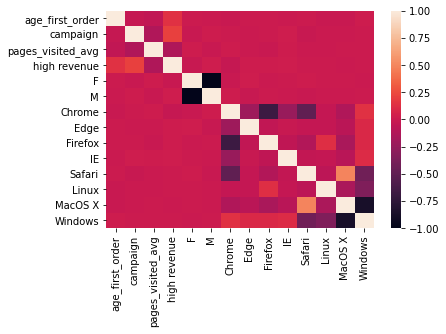

In [12]:
import seaborn as sns

sns.heatmap(dfTrans.corr())

In [62]:
dfTrans.drop(columns=['M'], inplace=True)
dfTrans

,age_first_order,campaign,pages_visited_avg,high revenue,F,Chrome,Edge,Firefox,IE,Safari,Linux,MacOS X,Windows
0,19.0,1,13.666667,0,0,1,0,0,0,0,0,1,0
1,65.0,0,13.666667,0,0,0,0,1,0,0,1,0,0
2,38.0,0,13.333333,0,0,1,0,0,0,0,0,1,0
3,42.0,1,12.333333,0,1,1,0,0,0,0,0,1,0
4,65.0,1,9.000000,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,12.0,0,15.000000,0,0,0,0,1,0,0,0,0,1
10783,28.0,0,9.000000,0,1,1,0,0,0,0,0,0,1
10784,48.0,1,9.666667,0,1,1,0,0,0,0,0,1,0
10785,65.0,0,3.000000,0,0,0,0,0,1,0,0,0,1


Nun müssen noch alle nicht binären Attribute normalisiert werden. Dafür soll diesmal minmax_scale verwendet werden. Erläutern Sie durch Kommentare die Funktion der einzelnen Code-Zeilen.

In [63]:
from sklearn.preprocessing import minmax_scale
# Komplettes Dataframe wird in ein neues (dfnorm) dupliziert
dfnorm = dfTrans.copy()

# Transformiert Sie Werte, indem jeder Wert auf einen bestimmten Bereich skaliert wird. 
# Jedes Merkmal wird einzeln skaliert einzeln, so dass es im gegebenen Bereich des Datensatzes liegt, d. h. zwischen null und eins. 
scaled = minmax_scale(dfnorm[['age_first_order','pages_visited_avg']], feature_range = (0, 1))

# In dem zweidimensionalen Array scaled befinden sich jeweils das Ergebnis für die beiden Spalten in einem Array
# Diese werden jeweils auf die Spalten aufgeteilt (1. Wert im Array=age_first_order, 2. Wert im Array=pages_visited_avg)
dfnorm['age_first_order'] = scaled[:,0] 
dfnorm['pages_visited_avg'] = scaled[:,1]

# Erste 5 Werte von beiden Spalten ausgeben 
dfnorm[['age_first_order', 'pages_visited_avg']].head()

,age_first_order,pages_visited_avg
0,0.178082,0.448718
1,0.808219,0.448718
2,0.438356,0.435897
3,0.493151,0.397436
4,0.808219,0.269231


## 4.3 Training & Bewertung der Modelle

Im Folgenden sollen die Algorithmen kNN und SVM trainiert und getestet werden. Dazu ist hier vorab ein Datensplit von 70 % (Trainingsdaten) zu 30 % (Testdaten) durchzuführen.

In [24]:
from sklearn.model_selection import train_test_split

x = dfnorm.drop(['high revenue'], axis = 1)
y = dfnorm['high revenue'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    random_state = 101, stratify = y, test_size = 0.3)

### A1: k-Nearest Neighbours (kNN)
Trainieren Sie den kNN auf den Trainingsdaten und evaluieren Sie auf den Testdaten. Testen Sie verschiedene Werte für k.

In [55]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 23)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)

In [56]:
neigh.kneighbors(x_test, 2, return_distance=False )

array([[5569, 3831],
       [2999, 2901],
       [2025, 3566],
       ...,
       [ 390,  294],
       [3302, 2534],
       [6927, 5594]])

#### Modellbewertung
Verwenden Sie danach den Scorer oder andere behandelte Methoden, um die Confusion Matrix und die Accuracy Ihrer Modelle zu bewerten.

### A2: Support Vector Machine
Trainieren Sie eine SVM auf den Trainingsdaten und evaluieren Sie auf den Testdaten. Testen Sie mit der Parameterübergabe (kernel = 'rbf', gamma = 'scale').

#### Modellbewertung
Verwenden Sie danach den Scorer oder andere behandelte Methoden, um die Confusion Matrix und die Accuracy Ihrer Modelle zu bewerten.

### Evaluation der Algorithmen
Bewerten Sie die Güte der beiden Algorithmen durch Evaluation der Ergebnisse. Welchen würden Sie einsetzen?

## 4.4 Optimierung mit GridSearch (Ausblick)
Gridsearch ist eine Methode zur Hyperparameteroptimierung. Gridsearch probiert iterativ alle Kombinationen der gewählten Parameter aus. Die Kombination mit dem höchsten Score wird anschließend ausgegeben.

Einfacheishalber wird hier auf eine Cross-Validation in der Übung verzichtet.

In [1]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### A1: SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state = 1)
param_grid1 = {"kernel": ["poly", "rbf", "sigmoid"], 
              "gamma": ["scale","auto"] }
gridSearch1 = GridSearchCV(estimator = svm_model, param_grid = param_grid1)
gridSearch1.fit(x_train, y_train)

results1 = pd.DataFrame(gridSearch1.cv_results_)

params1 = results1.loc[results1['rank_test_score'].idxmax()]
params1['params']

Nun wollen wir mit den besten Parametern das Modell trainieren.

Schauen Sie sich nun erneut die ConfusionMatrix an und vergleichen Sie.

### A1: k-Nearest Neighbours

Setzen Sie GridSearch nun für k-Nearest Neighbours um und wählen im param_grid verschiedene Werte für metric und n_neighbors.